Основные понятия  по теме дерево решений
 

Entropy and Information gain ﻿
Train / test split ﻿
K-fold cross-validation ﻿
Hyper parameters and Grid search ﻿
Дерево решений - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. В процессе построения дерева выбираются переменные разделение, по которым позволяет нам с большей точностью разделять исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.

Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. Могут использоваться и другие критерии.

По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели на тестовой выборке.
Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях в конкретной выборке.

Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.

В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.



In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from  graphviz import Source
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from IPython.display import HTML
style = '<style>svg{width:70% !important;height:70% !important;}</style>'

HTML(style)


sns.set(rc={'figure.figsize':(15,6)})

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score,roc_curve, auc


In [2]:
tree1=pd.read_csv('train_data_tree.csv')
tree1.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [3]:
y=tree1.num
X=tree1[['sex', 'exang']]

In [4]:
clf=DecisionTreeClassifier(criterion='entropy')
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
#tree1.isnull().sum()

In [6]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

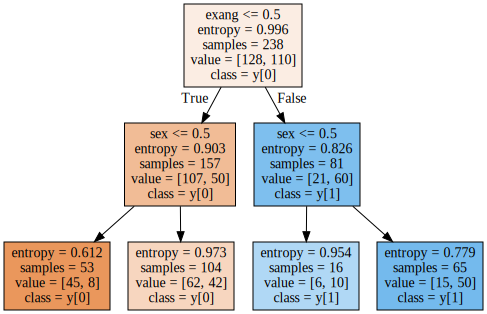

In [7]:
graph = Source(tree.export_graphviz(clf
                                    , out_file=None
                                    , feature_names=list(X)
                                    , class_names=True
                                    , filled=True))

display(SVG(graph.pipe(format='svg')))

In [8]:
information_gain=0.996 - (157/238)*0.903 - (81/238)*0.826 
information_gain

0.11920588235294122

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted=dt.predict(X_test)

In [11]:
predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [12]:
# Здесь выполняется другое задание, где берутся не X_train, y_train, а Х и у

In [13]:
parametrs={
    'min_samples_split':range(2,10)
    , 'max_depth': range(1, 10)
    ,'min_samples_leaf':range(1,10)
          }

#dt=tree.DecisionTreeClassifier()
dt=DecisionTreeClassifier()

In [14]:
search=GridSearchCV(dt, parametrs, cv=5
                                #, n_jobs=-1
                               )

In [15]:
search.fit(X , y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [16]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [17]:
best_tree =search.best_estimator_

In [19]:
### RandomizedSearchCV

In [ ]:
parametrs={
    'min_samples_split':range(2,10)
    , 'max_depth': range(1, 10)
    ,'min_samples_leaf':range(1,10)
          }

#dt=tree.DecisionTreeClassifier()
dt=DecisionTreeClassifier()

search=RandomizedSearchCV(dt, parametrs, cv=5
                                #, n_jobs=-1
                               )

search.fit(X , y)

best_tree =search.best_estimator_

Задание без данных. 


Воспользуемся изученными приёмами и попредсказываем!

Даны 2 датасэта, к которым вы можете обращаться:

    train - размеченный с известными правильным ответами (хранятся в колонке y)
    test - набор, где нужно предсказать их
Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions



In [20]:
'''X = train.drop('y', 1)
y = train['y']
X_test=pd.DataFrame(test)

parametrs={
    'min_samples_split':range(2,10)
    , 'max_depth': range(1, 10)
    ,'min_samples_leaf':range(1,10)
          }

#dt=tree.DecisionTreeClassifier()
dt=DecisionTreeClassifier()

search=GridSearchCV(dt, parametrs, cv=5
                                #, n_jobs=-1
                               )

search.fit(X , y)

best_tree =search.best_estimator_


predictions=best_tree.predict(X_test)'''

"X = train.drop('y', 1)\ny = train['y']\nX_test=pd.DataFrame(test)\n\nparametrs={\n    'min_samples_split':range(2,10)\n    , 'max_depth': range(1, 10)\n    ,'min_samples_leaf':range(1,10)\n          }\n\n#dt=tree.DecisionTreeClassifier()\ndt=DecisionTreeClassifier()\n\nsearch=GridSearchCV(dt, parametrs, cv=5\n                                #, n_jobs=-1\n                               )\n\nsearch.fit(X , y)\n\nbest_tree =search.best_estimator_\n\n\npredictions=best_tree.predict(X_test)"

### Conflusion matrix

При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.

В sklearn можно её удобно получить с помощью функции confusion_matrix. Вам даны 2 эррея с истинными классами наблюдений и предсказанными - y и predictions. Получите по ним confusion matrix и поместите её в переменную conf_matrix.



In [22]:
'''import pandas as pd
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, predictions)'''


'import pandas as pd\nfrom sklearn.metrics import confusion_matrix\nconf_matrix=confusion_matrix(y, predictions)'